<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-the-Kaggle-Titanic-competition-dataset" data-toc-modified-id="Read-the-Kaggle-Titanic-competition-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read the Kaggle Titanic competition dataset</a></span></li><li><span><a href="#EDA-and-pre-processing" data-toc-modified-id="EDA-and-pre-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA and pre-processing</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics-(data-shape,-balance,-etc)" data-toc-modified-id="Descriptive-statistics-(data-shape,-balance,-etc)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Descriptive statistics (data shape, balance, etc)</a></span><ul class="toc-item"><li><span><a href="#Target-distribution" data-toc-modified-id="Target-distribution-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Target distribution</a></span></li><li><span><a href="#Selected-features-vs-target-historgrams" data-toc-modified-id="Selected-features-vs-target-historgrams-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Selected features vs target historgrams</a></span></li><li><span><a href="#Data-summary---and-missing-values-analysis" data-toc-modified-id="Data-summary---and-missing-values-analysis-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Data summary - and missing values analysis</a></span></li></ul></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data pre-processing</a></span></li></ul></li><li><span><a href="#ML-template-starts---training-session" data-toc-modified-id="ML-template-starts---training-session-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ML template starts - training session</a></span><ul class="toc-item"><li><span><a href="#Training-model-(LGBM)-with-stratisfied-CV" data-toc-modified-id="Training-model-(LGBM)-with-stratisfied-CV-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Training model (LGBM) with stratisfied CV</a></span></li></ul></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model evaluation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Plot-of-the-CV-folds---F1-macro-and-F1-for-the-positive-class" data-toc-modified-id="Plot-of-the-CV-folds---F1-macro-and-F1-for-the-positive-class-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Plot of the CV folds - F1 macro and F1 for the positive class</a></span></li></ul></li><li><span><a href="#Scikit-learn---Classification-report" data-toc-modified-id="Scikit-learn---Classification-report-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Scikit learn - Classification report</a></span></li><li><span><a href="#ROC-curve-with-AUC" data-toc-modified-id="ROC-curve-with-AUC-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>ROC curve with AUC</a></span></li><li><span><a href="#Confusion-Matrix-plot-(normalized-and-with-absolute-values)" data-toc-modified-id="Confusion-Matrix-plot-(normalized-and-with-absolute-values)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Confusion Matrix plot (normalized and with absolute values)</a></span></li><li><span><a href="#Feature-Importance-plot" data-toc-modified-id="Feature-Importance-plot-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Feature Importance plot</a></span></li><li><span><a href="#Correlations-analysis-(on-top-features)" data-toc-modified-id="Correlations-analysis-(on-top-features)-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Correlations analysis (on top features)</a></span></li><li><span><a href="#Data-leakage-test" data-toc-modified-id="Data-leakage-test-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Data leakage test</a></span></li><li><span><a href="#Analysis-of-FPs/FNs" data-toc-modified-id="Analysis-of-FPs/FNs-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Analysis of FPs/FNs</a></span><ul class="toc-item"><li><span><a href="#Top-FPs-with-full-features" data-toc-modified-id="Top-FPs-with-full-features-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Top FPs with full features</a></span></li><li><span><a href="#Top-FNs-with-full-features" data-toc-modified-id="Top-FNs-with-full-features-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>Top FNs with full features</a></span></li></ul></li></ul></li></ul></div>

In [31]:
import warnings
import pandas as pd 
import numpy as np
from pandas_summary import DataFrameSummary
import octopus_ml as oc 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
%matplotlib inline
warnings.simplefilter("ignore")

# Read the Kaggle Titanic competition dataset 
https://www.kaggle.com/c/titanic

In [32]:
XY_df=pd.read_csv('../datasets/Kaggle_titanic_train.csv')

# EDA and pre-processing 

## Descriptive statistics (data shape, balance, etc)

In [33]:
XY_df.shape

(891, 12)

In [34]:
XY_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Target distribution

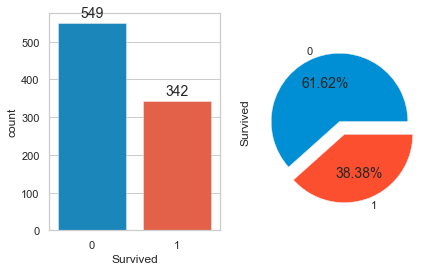

<Figure size 216x288 with 0 Axes>

In [35]:
oc.label_dist(XY_df,'Survived')

### Selected features vs target historgrams 

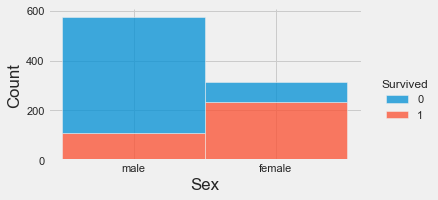

In [36]:
oc.hist_target(XY_df, 'Sex', 'Survived')

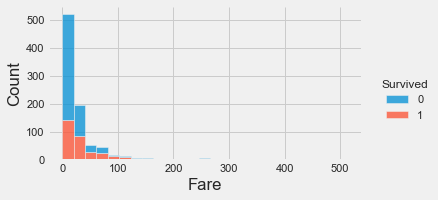

In [37]:
oc.hist_target(XY_df, 'Fare', 'Survived')

### Data summary - and missing values analysis

In [38]:
import missingno as msno
from pandas_summary import DataFrameSummary
dfs = DataFrameSummary(XY_df)
dfs.summary()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,NaN,NaN,714,891,891,NaN,891,NaN,NaN
mean,446,0.383838,2.30864,NaN,NaN,29.6991,0.523008,0.381594,NaN,32.2042,NaN,NaN
std,257.354,0.486592,0.836071,NaN,NaN,14.5265,1.10274,0.806057,NaN,49.6934,NaN,NaN
min,1,0,1,NaN,NaN,0.42,0,0,NaN,0,NaN,NaN
25%,223.5,0,2,NaN,NaN,20.125,0,0,NaN,7.9104,NaN,NaN
50%,446,0,3,NaN,NaN,28,0,0,NaN,14.4542,NaN,NaN
75%,668.5,1,3,NaN,NaN,38,1,0,NaN,31,NaN,NaN
max,891,1,3,NaN,NaN,80,8,6,NaN,512.329,NaN,NaN
counts,891,891,891,891,891,714,891,891,891,891,204,889
uniques,891,2,3,891,2,88,7,7,681,248,147,3


In [39]:
# Top 5 sparse features, mainly labs results 
pd.Series(1 - XY_df.count() / len(XY_df)).sort_values(ascending=False).head(5)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
Fare        0.000000
Ticket      0.000000
dtype: float64

## Data pre-processing 

In [40]:
XY_df['Cabin'] = XY_df['Cabin'].astype('str').fillna("U0")
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
XY_df['Deck'] = XY_df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
XY_df['Deck'] = XY_df['Deck'].map(deck)
XY_df['Deck'] = XY_df['Deck'].fillna(0)
XY_df['Deck'] = XY_df['Deck'].astype('category')

XY_df['relatives'] = XY_df['SibSp'] + XY_df['Parch']
XY_df.loc[XY_df['relatives'] > 0, 'not_alone'] = 0
XY_df.loc[XY_df['relatives'] == 0, 'not_alone'] = 1
XY_df['not_alone'] = XY_df['not_alone'].astype(int)

def encodeAgeFare(train):
    train.loc[train['Age'] <= 16, 'Age_fare'] = 0
    train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age_fare'] = 1
    train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age_fare'] = 2
    train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age_fare'] = 3
    train.loc[ (train['Age'] > 48) & (train['Age'] <= 80), 'Age_fare'] = 4
    
    train.loc[train['Fare'] <= 7.91, 'Fare'] = 0
    train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare_adj'] = 1
    train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31.0), 'Fare_adj'] = 2
    train.loc[(train['Fare'] > 31.0) & (train['Fare'] <= 512.329), 'Fare_adj'] = 3

encodeAgeFare(XY_df)


In [41]:
# Categorical features pre-proccesing  
cat_list ,XY_df=oc.cat_features_proccessing(XY_df)
print (cat_list)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Deck']


In [42]:
features=XY_df.columns.to_list()
print ('number of features ', len(features))

features_remove=['PassengerId','Survived']
for f in features_remove:
    features.remove(f)

number of features  17


In [43]:
X=XY_df[features]
y=XY_df['Survived']

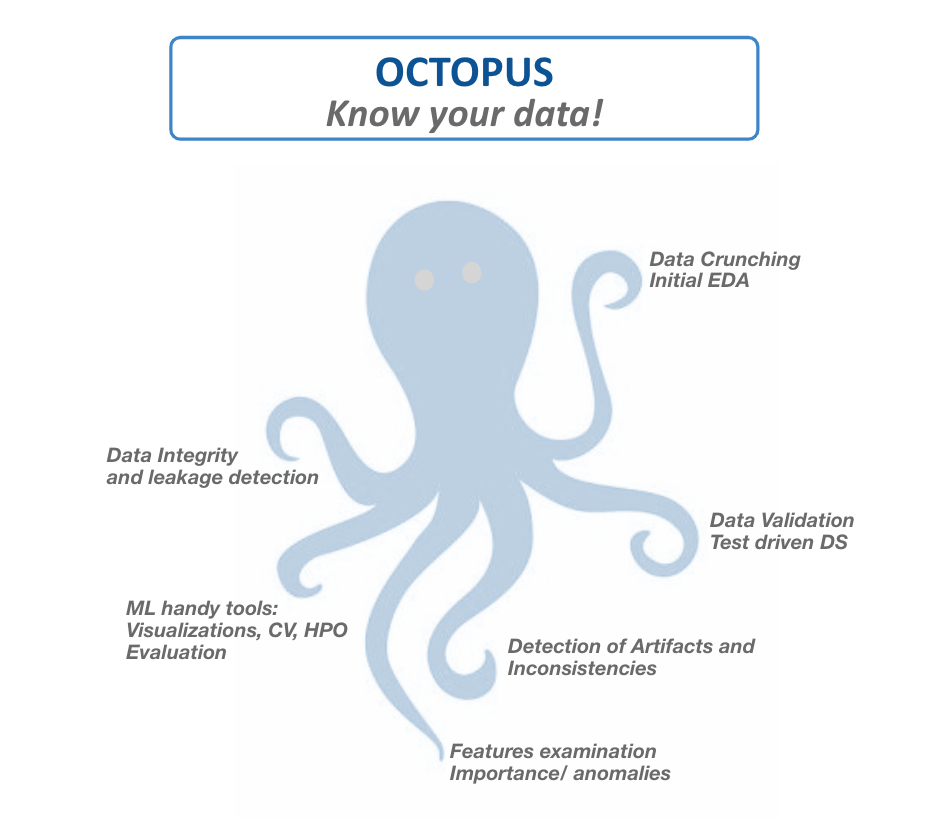

In [44]:
from IPython.display import Image
Image("../images/octopus_know_your_data.PNG", width=600, height=600)

In [45]:
XY_sampled=oc.sampling(XY_df,'Survived',200)

number of positive instances: 342 
number of negative instance :  549
new dataset shape:  (542, 17)
Method Name       : sampling
Current memory usage: 0.075039MB
Peak                : 0.088569MB
Total time taken:   14.157 ms 


# ML template starts - training session 

## Training model (LGBM) with stratisfied CV 

In [46]:
params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'auc',
        'learning_rate': 0.1,
        'n_estimators': 100,
        'verbose': -1,
        'max_depth': -1,
        'seed':100,      
        'min_split_gain': 0.01, 
        'num_leaves': 18, 
        'reg_alpha': 0.01, 
        'reg_lambda': 1.50,
        'feature_fraction':0.2,
        'bagging_fraction':0.84
}
    
metrics= oc.cv_adv(X,y,0.5,50,shuffle=True,params=params,method='full')

0it [00:00, ?it/s]

--------------------------- Running Cross-Validation - classification, mode: full ---------------------------
-> Starting 5-folds CV - Shuffle: True
[1]	training's auc: 0.764496	valid_1's auc: 0.612714
[2]	training's auc: 0.761571	valid_1's auc: 0.669433
[3]	training's auc: 0.774183	valid_1's auc: 0.698024
[4]	training's auc: 0.7974	valid_1's auc: 0.724967
[5]	training's auc: 0.852166	valid_1's auc: 0.812648
[6]	training's auc: 0.881762	valid_1's auc: 0.851054
[7]	training's auc: 0.884907	valid_1's auc: 0.864361
[8]	training's auc: 0.891307	valid_1's auc: 0.868445
[9]	training's auc: 0.891524	valid_1's auc: 0.872398
[10]	training's auc: 0.892667	valid_1's auc: 0.870026
[11]	training's auc: 0.890615	valid_1's auc: 0.874506
[12]	training's auc: 0.895354	valid_1's auc: 0.875231
[13]	training's auc: 0.895112	valid_1's auc: 0.877997
[14]	training's auc: 0.897094	valid_1's auc: 0.876548
[15]	training's auc: 0.897194	valid_1's auc: 0.875494
[16]	training's auc: 0.898796	valid_1's auc: 0.87101

1it [00:00,  3.14it/s]

[57]	training's auc: 0.926465	valid_1's auc: 0.870817
[58]	training's auc: 0.92659	valid_1's auc: 0.871476
[59]	training's auc: 0.927424	valid_1's auc: 0.871212
[60]	training's auc: 0.929694	valid_1's auc: 0.870158
[61]	training's auc: 0.929819	valid_1's auc: 0.870026
[62]	training's auc: 0.929852	valid_1's auc: 0.870553
[63]	training's auc: 0.929944	valid_1's auc: 0.869631
[64]	training's auc: 0.930687	valid_1's auc: 0.870685
[65]	training's auc: 0.930687	valid_1's auc: 0.870553
[66]	training's auc: 0.931404	valid_1's auc: 0.871212
[67]	training's auc: 0.931454	valid_1's auc: 0.872003
[68]	training's auc: 0.931955	valid_1's auc: 0.871739
[69]	training's auc: 0.932214	valid_1's auc: 0.872003
[70]	training's auc: 0.932973	valid_1's auc: 0.87253
[71]	training's auc: 0.933315	valid_1's auc: 0.873188
[72]	training's auc: 0.933515	valid_1's auc: 0.873452
[73]	training's auc: 0.933332	valid_1's auc: 0.872793
[74]	training's auc: 0.93339	valid_1's auc: 0.872661
[75]	training's auc: 0.933982	v

2it [00:00,  3.26it/s]

[1]	training's auc: 0.77218	valid_1's auc: 0.693917
[2]	training's auc: 0.766527	valid_1's auc: 0.726537
[3]	training's auc: 0.775265	valid_1's auc: 0.741043
[4]	training's auc: 0.797878	valid_1's auc: 0.749332
[5]	training's auc: 0.858271	valid_1's auc: 0.820187
[6]	training's auc: 0.882085	valid_1's auc: 0.84385
[7]	training's auc: 0.884463	valid_1's auc: 0.841845
[8]	training's auc: 0.889887	valid_1's auc: 0.848997
[9]	training's auc: 0.889185	valid_1's auc: 0.844719
[10]	training's auc: 0.889035	valid_1's auc: 0.850668
[11]	training's auc: 0.888071	valid_1's auc: 0.848663
[12]	training's auc: 0.894925	valid_1's auc: 0.851471
[13]	training's auc: 0.894402	valid_1's auc: 0.849866
[14]	training's auc: 0.896181	valid_1's auc: 0.846992
[15]	training's auc: 0.895391	valid_1's auc: 0.847259
[16]	training's auc: 0.896567	valid_1's auc: 0.848797
[17]	training's auc: 0.898388	valid_1's auc: 0.851537
[18]	training's auc: 0.898496	valid_1's auc: 0.852473
[19]	training's auc: 0.897432	valid_1's

4it [00:01,  3.43it/s]

[1]	training's auc: 0.776175	valid_1's auc: 0.734425
[2]	training's auc: 0.769736	valid_1's auc: 0.732487
[3]	training's auc: 0.776458	valid_1's auc: 0.739104
[4]	training's auc: 0.794099	valid_1's auc: 0.735361
[5]	training's auc: 0.858733	valid_1's auc: 0.810695
[6]	training's auc: 0.881295	valid_1's auc: 0.84111
[7]	training's auc: 0.885801	valid_1's auc: 0.848596
[8]	training's auc: 0.889355	valid_1's auc: 0.848329
[9]	training's auc: 0.890469	valid_1's auc: 0.84619
[10]	training's auc: 0.890565	valid_1's auc: 0.847393
[11]	training's auc: 0.89039	valid_1's auc: 0.848596
[12]	training's auc: 0.892348	valid_1's auc: 0.853008
[13]	training's auc: 0.891941	valid_1's auc: 0.854078
[14]	training's auc: 0.893425	valid_1's auc: 0.852674
[15]	training's auc: 0.892909	valid_1's auc: 0.852005
[16]	training's auc: 0.895291	valid_1's auc: 0.854078
[17]	training's auc: 0.896572	valid_1's auc: 0.855147
[18]	training's auc: 0.895574	valid_1's auc: 0.855682
[19]	training's auc: 0.895757	valid_1's 

5it [00:01,  3.42it/s]


-> Training final model on the full-set

[1]	training's auc: 0.771669	valid_1's auc: 0.808137
[2]	training's auc: 0.763893	valid_1's auc: 0.822165
[3]	training's auc: 0.775267	valid_1's auc: 0.832469
[4]	training's auc: 0.795407	valid_1's auc: 0.856867
[5]	training's auc: 0.854198	valid_1's auc: 0.904467
[6]	training's auc: 0.879757	valid_1's auc: 0.918428
[7]	training's auc: 0.8816	valid_1's auc: 0.92029
[8]	training's auc: 0.887177	valid_1's auc: 0.92388
[9]	training's auc: 0.887901	valid_1's auc: 0.922816
[10]	training's auc: 0.888692	valid_1's auc: 0.922683
[11]	training's auc: 0.887765	valid_1's auc: 0.92029
[12]	training's auc: 0.891629	valid_1's auc: 0.923016
[13]	training's auc: 0.89165	valid_1's auc: 0.92368
[14]	training's auc: 0.892497	valid_1's auc: 0.927669
[15]	training's auc: 0.893309	valid_1's auc: 0.926606
[16]	training's auc: 0.894481	valid_1's auc: 0.929398
[17]	training's auc: 0.895323	valid_1's auc: 0.930993
[18]	training's auc: 0.895573	valid_1's auc: 0.931259
[19

# Model evaluation 

### Plot of the CV folds - F1 macro and F1 for the positive class 
(in this case it's an unbalanced dataset)

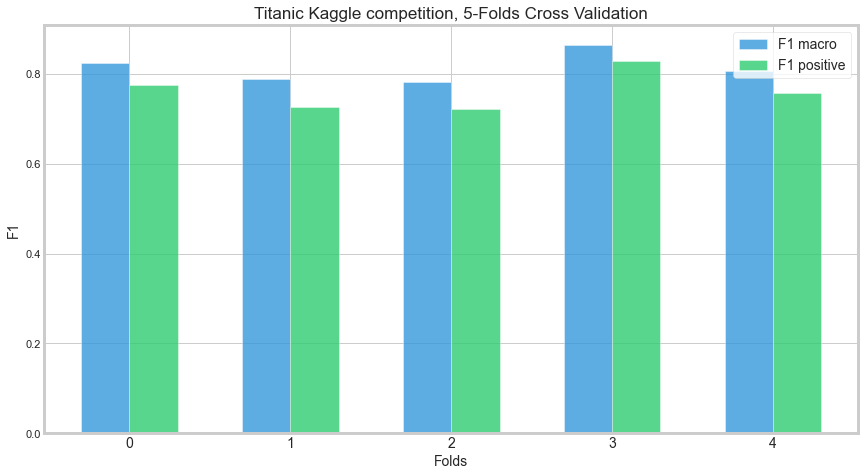

In [47]:
oc.cv_plot(metrics['f1_weighted'],metrics['f1_macro'],metrics['f1_positive'],'Titanic Kaggle competition')

## Scikit learn - Classification report 

In [48]:
print(classification_report(metrics['y'], metrics['predictions_folds']))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       549
           1       0.81      0.72      0.76       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.83      0.83      0.83       891



## ROC curve with AUC

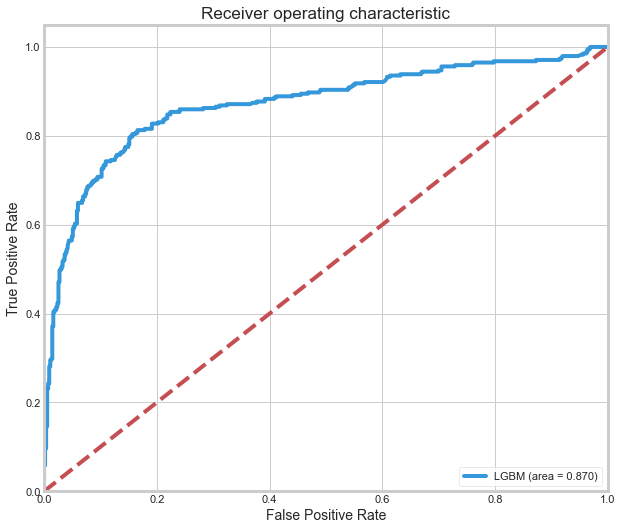

In [49]:
oc.roc_curve_plot(metrics['y'], metrics['predictions_proba'])

## Confusion Matrix plot (normalized and with absolute values) 

<Figure size 432x288 with 0 Axes>

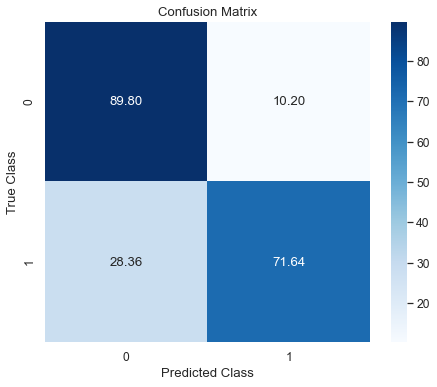

<Figure size 432x288 with 0 Axes>

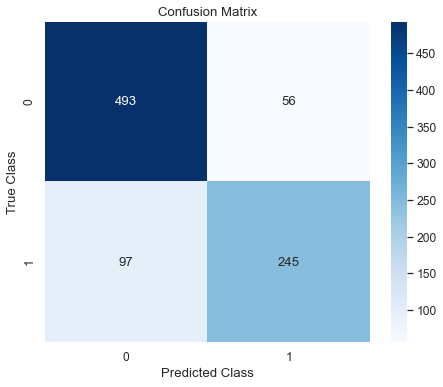

In [50]:
oc.confusion_matrix_plot(metrics['y'], metrics['predictions_folds'])

## Feature Importance plot 

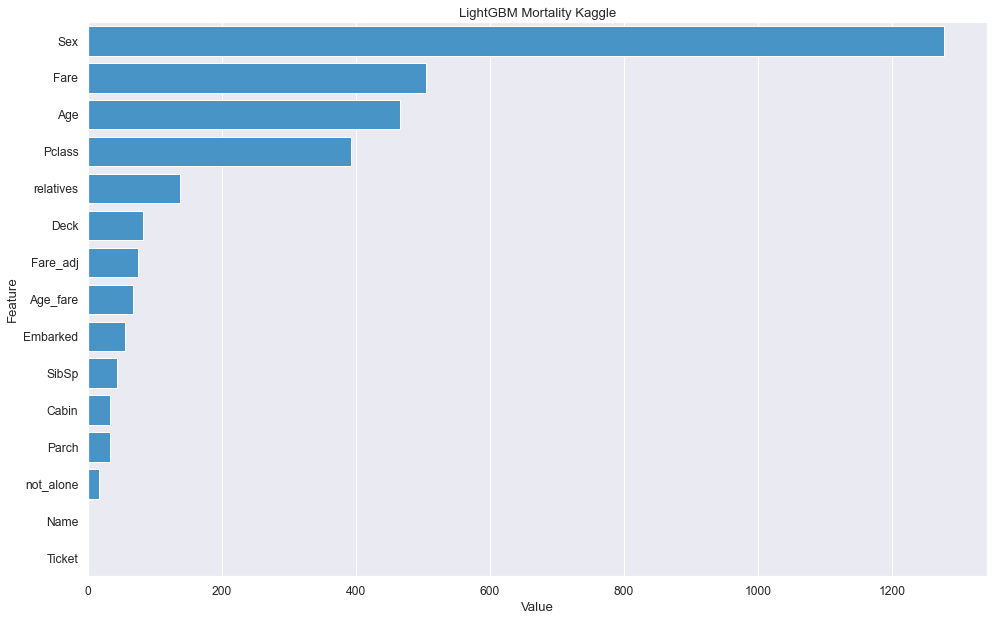

In [51]:
feature_imp_list=oc.plot_imp(metrics['final_clf'],X,'LightGBM Mortality Kaggle',num=15)

In [52]:
top_features=feature_imp_list.sort_values(by='Value', ascending=False).head(20)

In [53]:
top_features

,Value,Feature
2,1277.191074,Sex
7,505.184307,Fare
3,465.067944,Age
0,391.909616,Pclass
11,137.200578,relatives
10,82.758717,Deck
14,74.876172,Fare_adj
13,67.989426,Age_fare
9,55.595229,Embarked
4,43.271478,SibSp


## Correlations analysis (on top features)

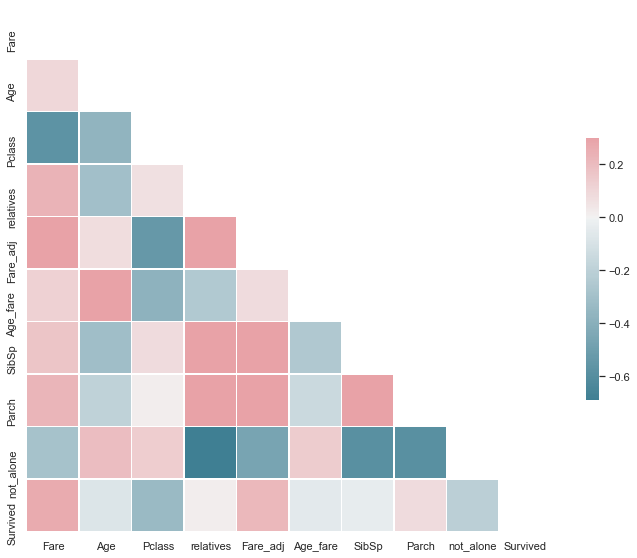

In [54]:
list_for_correlations=top_features['Feature'].to_list()
list_for_correlations.append('Survived')
oc.correlations(XY_df,list_for_correlations)

Best score using built-in LassoCV: 0.175658


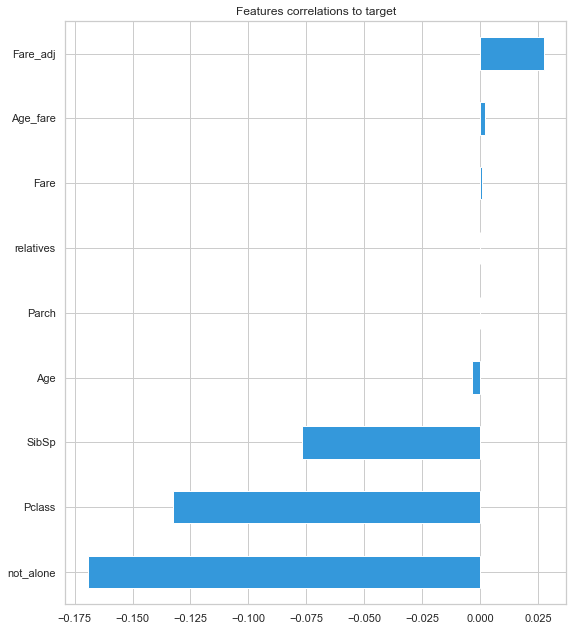

In [55]:
oc.target_corr(X,y,top_features['Feature'].to_list())

## Data leakage test 

In [56]:
oc.data_leakage(X,top_features['Feature'].to_list())

->  Passed the data leakage test - no duplicate intstances detected 
Method Name       : data_leakage
Current memory usage: 0.019656MB
Peak                : 0.188689MB
Total time taken:   9.089 ms 


## Analysis of FPs/FNs

<AxesSubplot:title={'center':'Predictions Distribution'}>

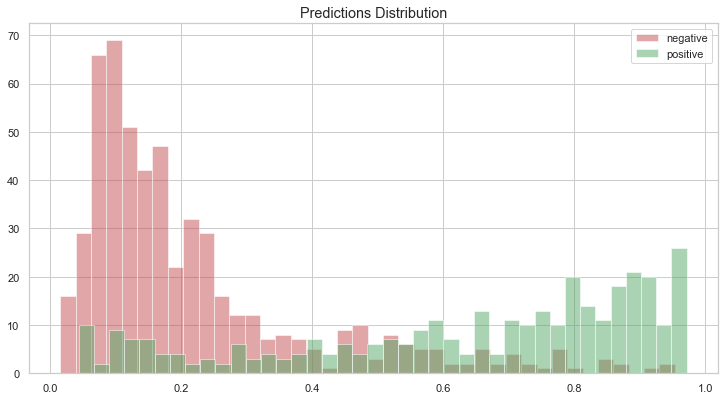

In [57]:
oc.preds_distribution(metrics['y'], metrics['predictions_proba'], bins=40)

In [58]:
fps=oc.recieve_fps(XY_df, metrics['index'] ,metrics['y'], metrics['predictions_proba'],top=10)
fns=oc.recieve_fns(XY_df, metrics['index'] ,metrics['y'], metrics['predictions_proba'],top=10)

calculating using threshold of:  0.5
calculating using threshold of:  0.5


In [59]:
fps

,index,label,preds_proba,preds_class
0,297,0,0.953875,1
1,852,0,0.932632,1
2,205,0,0.911668,1
3,312,0,0.878472,1
4,498,0,0.873867,1
5,41,0,0.852585,1
6,177,0,0.843770,1
7,772,0,0.843260,1
8,657,0,0.804047,1
9,140,0,0.788063,1


In [60]:
fns

,index,label,preds_proba,preds_class
0,444,1,0.044212,0
1,570,1,0.044627,0
2,709,1,0.046397,0
3,65,1,0.046397,0
4,338,1,0.049220,0
5,127,1,0.051358,0
6,107,1,0.053537,0
7,271,1,0.061725,0
8,391,1,0.062768,0
9,400,1,0.064742,0


In [61]:
filter_fps  = XY_df[XY_df.index.isin(fps['index'])]
filter_fns  = XY_df[XY_df.index.isin(fns['index'])]
filter_fps_with_prediction=pd.merge(filter_fps,fps[['index','preds_proba']], left_on=[pd.Series(filter_fps.index.values)], right_on=fps['index']) 
filter_fns_with_prediction=pd.merge(filter_fns,fns[['index','preds_proba']], left_on=[pd.Series(filter_fns.index.values)], right_on=fns['index']) 

### Top FPs with full features 

In [62]:
filter_fps_with_prediction

,key_0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,relatives,not_alone,Age_fare,Fare_adj,index,preds_proba
0,41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)",female,27.0,1,0,11668,21.0000,nan,S,0.0,1,0,1.0,2.0,41,0.852585
1,140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,nan,C,0.0,2,0,NaN,2.0,140,0.788063
2,177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,3.0,0,1,4.0,2.0,177,0.843770
3,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,7.0,1,0,0.0,1.0,205,0.911668
4,297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,3.0,3,0,0.0,3.0,297,0.953875
5,312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,nan,S,0.0,2,0,1.0,2.0,312,0.878472
6,498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,3.0,3,0,1.0,3.0,498,0.873867
7,657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,nan,Q,0.0,2,0,1.0,2.0,657,0.804047
8,772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S,5.0,0,1,4.0,1.0,772,0.843260
9,852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,nan,C,0.0,2,0,0.0,2.0,852,0.932632


### Top FNs with full features 

In [63]:
filter_fns_with_prediction

,key_0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,relatives,not_alone,Age_fare,Fare_adj,index,preds_proba
0,65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,nan,C,0.0,2,0,NaN,2.0,65,0.046397
1,107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,0.0000,nan,S,0.0,0,1,NaN,NaN,107,0.053537
2,127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,0.0000,nan,S,0.0,0,1,1.0,NaN,127,0.051358
3,271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,nan,S,0.0,0,1,1.0,NaN,271,0.061725
4,338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,nan,S,0.0,0,1,2.0,1.0,338,0.049220
5,391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,0.0000,nan,S,0.0,0,1,1.0,NaN,391,0.062768
6,400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,nan,S,0.0,0,1,2.0,1.0,400,0.064742
7,444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,nan,S,0.0,0,1,NaN,1.0,444,0.044212
8,570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,nan,S,0.0,0,1,4.0,1.0,570,0.044627
9,709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,nan,C,0.0,2,0,NaN,2.0,709,0.046397
